In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

## 5. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

### Take a look at the first 10 rows.
### Look at the last 5 rows. Do you see a problem?
### Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [3]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')[:-2]
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   object 
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 210.4+ KB


In [5]:
#gdp_df = pd.read_csv("../gdp_per_capita.csv", nrows=6727)

In [6]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [7]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [8]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   object 
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 210.4+ KB


## 6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [9]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   object 
 2   Value            6729 non-null   float64
dtypes: float64(1), object(2)
memory usage: 157.8+ KB


In [10]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   object 
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), object(2)
memory usage: 157.8+ KB


## 7. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [11]:
gdp_df.Year = gdp_df.Year.astype(int)
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


## 8. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

The years 1990 through 2018 are represented in the dataset. The number of participating countries peaked in 2011 with 243 countries reporting data.

In [12]:
gdp_df.Year.max()

2018

In [13]:
gdp_df.Year.min()

1990

In [14]:
gdp_df.Year.value_counts()

2011    243
2012    241
2009    241
2010    241
2013    241
2015    240
2008    240
2014    240
2007    239
2016    239
2017    239
2005    238
2004    238
2002    238
2006    238
2003    238
2001    237
2000    236
1999    228
1998    227
2018    226
1997    226
1996    224
1995    224
1994    218
1993    215
1992    213
1991    211
1990    210
Name: Year, dtype: int64

In [15]:
gdp_df.Country.value_counts()

IDA total                    29
Netherlands                  29
The Bahamas                  29
Bulgaria                     29
Uzbekistan                   29
                             ..
Nauru                        12
Sint Maarten (Dutch part)     9
Turks and Caicos Islands      8
South Sudan                   8
Djibouti                      1
Name: Country, Length: 243, dtype: int64

## 9. How many countries are represented in data set?

In [16]:
gdp_df.Country.nunique()

243

In [17]:
gdp_df.groupby('Country')['Year'].nunique()

Country
Afghanistan            17
Albania                29
Algeria                29
Angola                 29
Antigua and Barbuda    29
                       ..
West Bank and Gaza     25
World                  29
Yemen                  29
Zambia                 29
Zimbabwe               29
Name: Year, Length: 243, dtype: int64

In [18]:
gdp_df.groupby('Year')['Country'].nunique()

Year
1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Country, dtype: int64

What countries are least represented in the data?  : Nauru, Sint Maarten, Turks & Caicos Islands, South Sudan, Djibouti are least represented. 

## 10. Create new dataframe by subsetting gdp_df to just the year 2014

In [19]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
gdp_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 4 to 6704
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         240 non-null    object 
 1   Year            240 non-null    int64  
 2   GDP_Per_Capita  240 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.5+ KB


In [20]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


In [21]:
gdp_2014.sample(5)

,Country,Year,GDP_Per_Capita
5458,South Africa,2014,12388.256658
5344,Sint Maarten (Dutch part),2014,33640.795768
6646,Yemen,2014,3828.484887
2524,Hungary,2014,24220.733937
5316,Singapore,2014,81965.361071


## 11. Use .describe() to find the summary statistics for GDP per capita in 2014

In [22]:
gdp_2014.describe()
gdp_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 4 to 6704
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         240 non-null    object 
 1   Year            240 non-null    int64  
 2   GDP_Per_Capita  240 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.5+ KB


## 12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

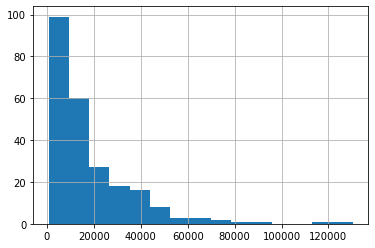

In [23]:
gdp_2014.GDP_Per_Capita.hist(bins = 15)

The shape of the distribution is right skewed.

## 13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014


In [24]:
gdp_2014.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


## 14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.


If you do this, you will create a multi-level index: 
gdp_pivoted = gdp_pivoted.pivot_table(values = ['GDP_Per_Capita'], index = ['Country'], columns = ['Year']).dropna()

If you do this, you'll create a single-level index: 
gdp_pivoted = gdp_pivoted.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year').dropna()
gdp_pivoted.columns will tell you what you should be calling to grab

gdp_pivoted['Percent_Change'] = 100 * ((gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]) 

In [25]:
gdp_df[(gdp_df['Year']==1990) | (gdp_df['Year']==2017)].pivot_table(values='GDP_Per_Capita', index='Country', columns='Year')

Year,1990,2017
Country,,
Afghanistan,NaN,1758.465636
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
...,...,...
West Bank and Gaza,NaN,4651.723645
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


In [26]:
gdp_pivoted = gdp_df[(gdp_df['Year']==1990) | (gdp_df['Year']==2017)].pivot_table(values='GDP_Per_Capita', index='Country', columns='Year').dropna()
gdp_pivoted

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
...,...,...
Vietnam,1457.594613,6233.485045
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


In [27]:
#gdp_pivoted = gdp_df.pivot_table(columns=['Year'], index=['Country'], values='GDP_Per_Capita')[[1990, 2017]].dropna()


In [28]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
gdp_pivoted

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
Argentina,11372.823108,18945.144022
Armenia,3742.431024,8744.731368
Aruba,37140.024657,35861.828118
Australia,28669.059474,44781.322760


## 15. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

https://stackoverflow.com/questions/42100058/percentage-difference-between-any-two-columns-of-pandas-dataframe

In [29]:
gdp_pivoted['Percent_Change'] = gdp_pivoted.apply(lambda row: (row.iloc[1]-row.iloc[0])/row.iloc[0]*100, axis=1)

In [30]:
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972
Argentina,11372.823108,18945.144022,66.582596
Armenia,3742.431024,8744.731368,133.664463
Aruba,37140.024657,35861.828118,-3.441561
Australia,28669.059474,44781.322760,56.200879


In [31]:
#gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

#gdp_pivoted_negative = gdp_pivoted[gdp_pivoted["Percent_Change"] < 0]
#gdp_pivoted_negative_sorted = gdp_pivoted_negative.sort_values(by=['Percent_Change'])
#gdp_pivoted_negative_sorted

## 16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [32]:
gdp_pivoted[gdp_pivoted['Percent_Change']< 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Aruba to Zimbabwe
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   1990            20 non-null     float64
 1   2017            20 non-null     float64
 2   Percent_Change  20 non-null     float64
dtypes: float64(3)
memory usage: 640.0+ bytes


In [33]:
gdp_pivoted.sample(10)

Year,1990,2017,Percent_Change
Country,,,
Early-demographic dividend,4457.048493,8852.532913,98.618726
Jamaica,7301.354605,8157.122078,11.720667
Jordan,6361.872368,8399.966727,32.036077
Heavily indebted poor countries (HIPC),1528.230304,2215.089351,44.944734
Aruba,37140.024657,35861.828118,-3.441561
The Gambia,2448.493198,2240.327478,-8.501789
Tuvalu,2377.479429,3548.181935,49.241331
Comoros,2580.500555,2555.966364,-0.950753
European Union,24872.591276,37425.012533,50.466882


## 17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

In [34]:
gdp_pivoted.sort_values(by='Percent_Change', ascending=False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241
Myanmar,730.228038,5610.324700,668.297629
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
Vietnam,1457.594613,6233.485045,327.655604
Bhutan,2259.568462,9042.907491,300.205068
Cabo Verde,1676.190288,6367.984878,279.908231
Lao PDR,1708.034226,6310.067080,269.434463


In [35]:
china_eqguinea = gdp_df.copy()

china_eqguinea = china_eqguinea[(china_eqguinea['Country'] == 'Equatorial Guinea')|(china_eqguinea['Country'] == 'China')]

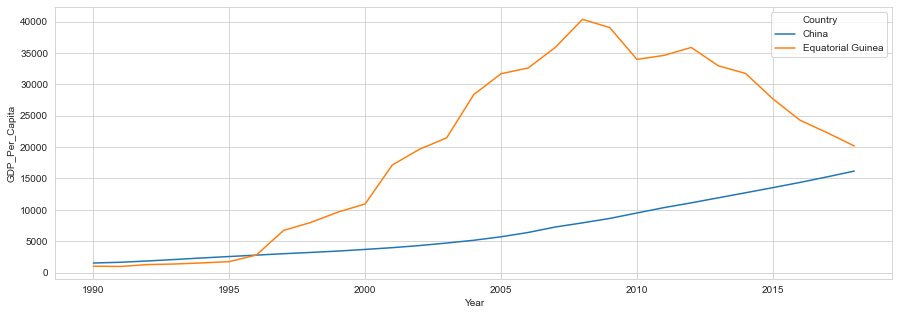

In [36]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
sns.lineplot(data= china_eqguinea, x = 'Year', y='GDP_Per_Capita', hue ='Country');

In [37]:
#gdp_df_large = gdp_df.loc[gdp_df['Country'].isin(distinct_countries)]
#fig, ax = plt.subplots()
#gdp_df_large.groupby('Country').plot(x='Year', y='GDP_Per_Capita', ax=ax);

## 18. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [38]:
continents = pd.read_csv('../data/continents.csv')
continents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  216 non-null    object
 1   Country    216 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


## 19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [39]:
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

In [40]:
continents.columns

Index(['Continent', 'Country'], dtype='object')

In [41]:
gdp_df = gdp_df.merge(continents, on='Country', how='inner')
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5334 non-null   object 
 1   Year            5334 non-null   int64  
 2   GDP_Per_Capita  5334 non-null   float64
 3   Continent       5334 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 208.4+ KB


In [42]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia


In [43]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia


## 20. Determine the number of countries per continent. Create a bar chart showing this.

#### Using value_counts() much less clean than nunique().  Value counts returned multilevel index with continent and country both.
gdp_df.groupby('Continent')['Country'].value_counts()

In [44]:
gdp_df.groupby('Continent')['Country'].nunique()

Continent
Africa           51
Asia             44
Europe           45
North America    26
Oceania          14
South America    12
Name: Country, dtype: int64

In [45]:
#plt.figure(figsize=(15,5))
#sns.set_style("whitegrid")
#sns.countplot(data= gdp_df.groupby('Continent')['Country'].nunique(), x = 'Continent');

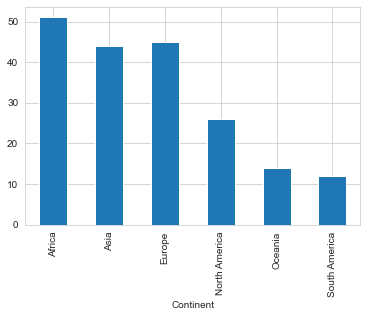

In [46]:
gdp_df.groupby('Continent')['Country'].nunique().plot(kind = 'bar')
plt.show()

## 21. Creat a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [47]:
gdp_continent_2014 = gdp_df.copy()
gdp_continent_2014 = gdp_df[gdp_df['Year']==2014]
gdp_continent_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 4 to 5309
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         189 non-null    object 
 1   Year            189 non-null    int64  
 2   GDP_Per_Capita  189 non-null    float64
 3   Continent       189 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.4+ KB


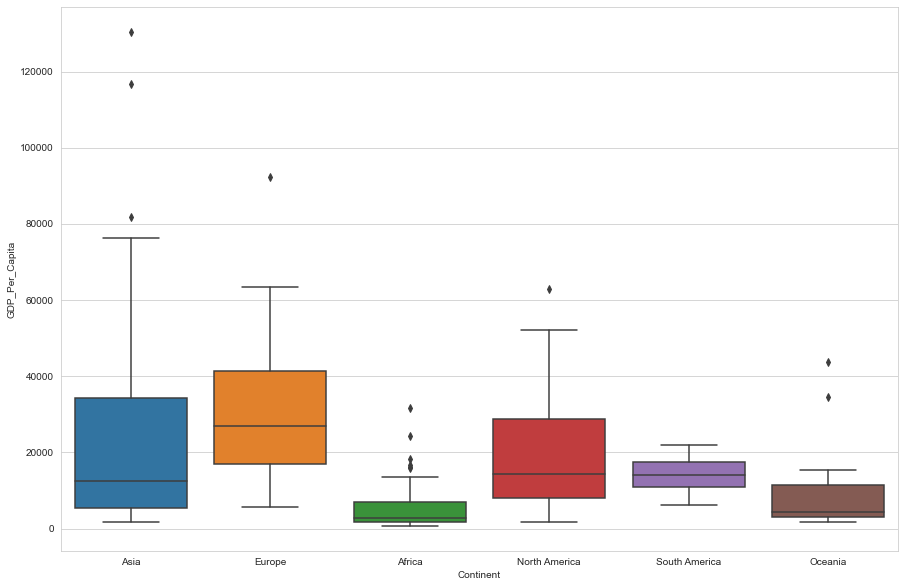

In [48]:
plt.figure(figsize=(15,10))
sns.boxplot( x=gdp_continent_2014['Continent'], y=gdp_continent_2014['GDP_Per_Capita']);
plt.show()

## 22. Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [49]:
#internet_df = pd.read_csv('../data/internet_use.csv', error_bad_lines = False)
#internet_df.info()

In [50]:
#internet_df = pd.read_csv('../data/internet_use.csv', skiprows=list(range(4497,4688)))

In [51]:
internet_df = pd.read_csv('../data/internet_use.csv', usecols=['Country or Area', 'Year', 'Value'])[:-181]
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country or Area  4495 non-null   object
 1   Year             4495 non-null   object
 2   Value            4495 non-null   object
dtypes: object(3)
memory usage: 105.5+ KB


In [52]:
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.39
1,Afghanistan,2013,5.9
2,Afghanistan,2012,5.45454545454545
3,Afghanistan,2011,5
4,Afghanistan,2010,4


In [53]:
internet_df.tail()

,Country or Area,Year,Value
4490,Zimbabwe,1997,0.033080326724463
4491,Zimbabwe,1996,0.016790483892511
4492,Zimbabwe,1995,0.00768353991953285
4493,Zimbabwe,1994,0.00173927955909959
4494,Zimbabwe,1990,0


## 23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

Alternately: internet_df = internet_df.drop(columns=['Value Footnotes'])

Two options here - explicitly drop Value_Footnotes column OR pass in list of column names and exclude that one

In [54]:
internet_df.columns=['Country', 'Year', 'Internet_Users_Pct']
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             4495 non-null   object
 1   Year                4495 non-null   object
 2   Internet_Users_Pct  4495 non-null   object
dtypes: object(3)
memory usage: 105.5+ KB


### Change Year and Internet_Users_Pct to numbers

alternately:
gdp_df.Year = gdp_df.Year.astype(int)


In [55]:
internet_df[['Year', 'Internet_Users_Pct']] = internet_df[['Year', 'Internet_Users_Pct']].apply(pd.to_numeric, errors = 'coerce')
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


## 24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [56]:
internet_df.shape

(4495, 3)

In [57]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


## 25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [58]:
#internet_df.groupby(['Year','Country'])['Internet_Users_Pct'].sum()

In [59]:
internet_df.groupby('Year')['Internet_Users_Pct'].sum()

Year
1960       0.000000
1965       0.000000
1970       0.000000
1975       0.000000
1976       0.000000
1977       0.000000
1978       0.000000
1979       0.000000
1980       0.000000
1981       0.000000
1982       0.000000
1983       0.000000
1984       0.000000
1985       0.000000
1986       0.000000
1987       0.000000
1988       0.000000
1989       0.000000
1990       5.032933
1991      10.931876
1992      19.951850
1993      30.144702
1994      60.571026
1995     131.726726
1996     253.150223
1997     454.897179
1998     750.253424
1999    1172.587525
2000    1768.346984
2001    2198.771961
2002    2813.872118
2003    3250.897681
2004    3794.284115
2005    4278.601987
2006    4783.780564
2007    5290.186501
2008    5814.472583
2009    6338.399306
2010    6959.455800
2011    7779.505598
2012    8191.847053
2013    8654.211824
2014    9140.469980
Name: Internet_Users_Pct, dtype: float64

In [60]:
internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year')

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


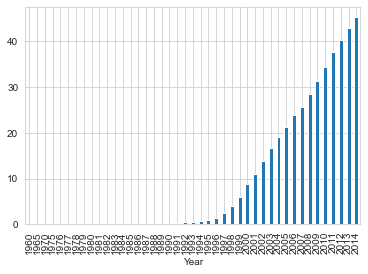

In [61]:
internet_df.groupby('Year')['Internet_Users_Pct'].mean().plot(kind='bar')

In [62]:
#gdp_df.groupby('Continent_x')['Country'].nunique().plot(kind = 'bar')
#plt.show()

## 26. Merge gdp_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.

### Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.
--> Use anti join to find the mismatching names. Then if/elif/else to rename OR perhaps dictionary
Then repeat the merge and see what changes.

In [63]:
gdp_df['Country'].nunique()

192

In [64]:
internet_df['Country'].nunique()

213

In [65]:
gdp_and_internet_use=gdp_df.merge(internet_df, on=['Year','Country'], how='inner')
gdp_and_internet_use.columns

Index(['Country', 'Year', 'GDP_Per_Capita', 'Continent', 'Internet_Users_Pct'], dtype='object')

In [66]:
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3519 entries, 0 to 3518
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             3519 non-null   object 
 1   Year                3519 non-null   int64  
 2   GDP_Per_Capita      3519 non-null   float64
 3   Continent           3519 non-null   object 
 4   Internet_Users_Pct  3519 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 165.0+ KB


## 27. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [67]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [68]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739
3518,Zimbabwe,1990,2819.549467,Africa,0.000000


## 28. Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. What is the mean internet users percentage in 2014? How many countries have at least 90% internet users in 2014?


Mean internet use percent in 2014 is 44.7%


In [69]:
gdp_and_internet_use_2014 = gdp_and_internet_use.copy()
gdp_and_internet_use_2014 = gdp_and_internet_use_2014[gdp_and_internet_use_2014['Year']== 2014]
gdp_and_internet_use_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 3497
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             164 non-null    object 
 1   Year                164 non-null    int64  
 2   GDP_Per_Capita      164 non-null    float64
 3   Continent           164 non-null    object 
 4   Internet_Users_Pct  164 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.7+ KB


In [70]:
gdp_and_internet_use_2014.describe()

,Year,GDP_Per_Capita,Internet_Users_Pct
count,164.0,164.000000,164.000000
mean,2014.0,18445.067848,44.673536
std,0.0,19137.566367,29.369046
min,2014.0,768.469837,1.140000
25%,2014.0,4162.098972,17.452500
50%,2014.0,12118.225568,43.775000
75%,2014.0,26083.572781,70.295000
max,2014.0,116693.507701,98.160000


In [71]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct']>=90].nunique()

Country               12
Year                   1
GDP_Per_Capita        12
Continent              2
Internet_Users_Pct    12
dtype: int64

## 29. Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these three countries. Each individual figure in the facet grid will represent a single country. What trends do you notice?

In [72]:
#df.sort_values() --> Qatar, Luxembourg, Singapore

In [73]:
gdp_and_internet_use_2014.sort_values(by=['GDP_Per_Capita'],ascending=False)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49000
1812,Luxembourg,2014,92349.186429,Europe,94.67000
2765,Singapore,2014,81965.361071,Asia,82.00000
1685,Kuwait,2014,72588.670676,Asia,78.70000
2310,Norway,2014,63328.259526,Europe,96.30000
626,Cayman Islands,2014,62929.873118,North America,74.10000
3297,United Arab Emirates,2014,62879.703021,Asia,90.40000
3017,Switzerland,2014,57218.023232,Europe,87.00000
3343,United States,2014,52080.792568,North America,87.36000
2670,Saudi Arabia,2014,49731.779297,Asia,63.70000


In [74]:
top_gdp_list = ['Qatar','Luxembourg','Singapore']

top_gdp_df = gdp_and_internet_use.copy()
top_gdp_df = top_gdp_df[top_gdp_df['Country'].isin(top_gdp_list)]

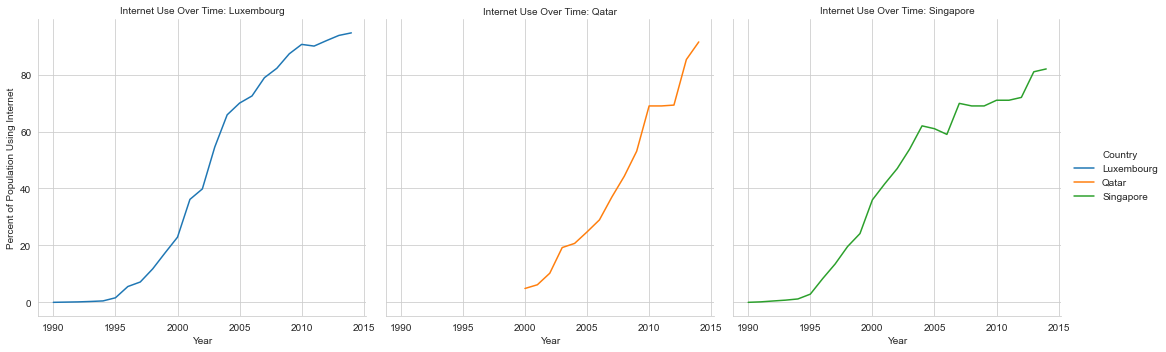

In [75]:
sns.set_style('whitegrid')
g = sns.relplot(
    data=top_gdp_df,
    x="Year", y="Internet_Users_Pct",
    hue="Country", col="Country",
    height=5, aspect=1, kind="line"
)
(g.set_axis_labels("Year", "Percent of Population Using Internet")
  .set_titles("Internet Use Over Time: {col_name}")
);

To stack veritcally, pass in row='Country' argument. The x-axis labels do not reproduce for each individual figure in facet grid (same as y-axis above). Figsize is larger, but more difficult to read w/o x-lablels. 

Find argument to fix this --> https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

sns.set_style('whitegrid')
g = sns.relplot(
    data=top_gdp_df,
    x="Year", y="Internet_Users_Pct",
    hue="Country", row="Country",
    height=4, aspect=1.9, kind="line"
)
(g.set_axis_labels("Year", "Internet Users as % Population")
  .set_titles("Internet Use Over Time: {row_name}")
);

## 30. Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?


In [76]:
#gdp_and_internet_use_2014.plot(kind = 'scatter', y = 'GDP_Per_Capita', x = 'Internet_Users_Pct');

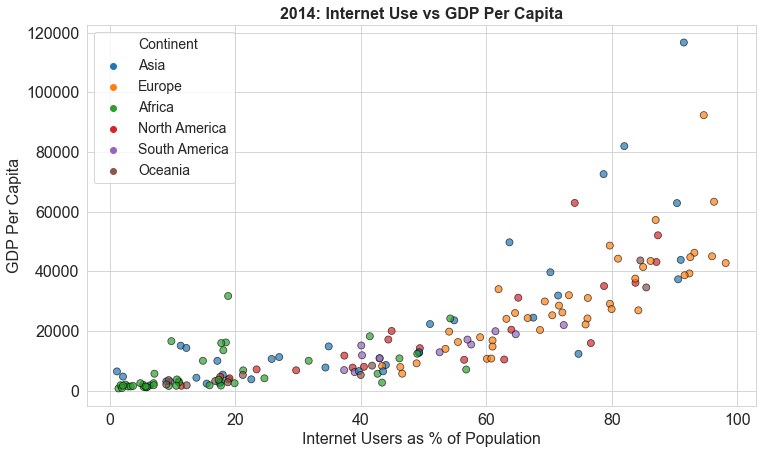

In [77]:
fontsize = 16

plt.figure(figsize = (12,7))
sns.scatterplot(data = gdp_and_internet_use_2014, x = 'Internet_Users_Pct', y = 'GDP_Per_Capita', s = 50,
                hue = 'Continent',
                alpha = 0.7, edgecolor = 'black')
plt.xticks(fontsize = fontsize)
plt.xlabel('Internet Users as % of Population', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('GDP Per Capita', fontsize = fontsize)
plt.title('2014: Internet Use vs GDP Per Capita', fontsize = fontsize, fontweight = 'bold')
plt.legend(fontsize = fontsize - 2);

## 31. Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

The correlation coefficient returns Pearson's 'r' value, which indicates the strength of a linear relationship between two variables.  The r value here indicates there is a fairly strong linear relationship between internet use and GDP per capita.

In [78]:
#Pandas .corr() applied across columns of dataframe with suitable dtypes returns answer as a dataframe
gdp_and_internet_use_2014.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct
Year,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.787989
Internet_Users_Pct,NaN,0.787989,1.000000


In [79]:
#Pandas .corr() for only the two columns interested in returns answer as a single value
gdp_and_internet_use_2014['GDP_Per_Capita'].corr(gdp_and_internet_use_2014['Internet_Users_Pct'])

0.7879885707262836

In [80]:
#Numpy np.corcoef() passing in the two columns returns answer as array
np.corrcoef(gdp_and_internet_use_2014['GDP_Per_Capita'], gdp_and_internet_use_2014['Internet_Users_Pct'])

array([[1.        , 0.78798857],
       [0.78798857, 1.        ]])

## 32. Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

When the log is applied to GDP Per Capita, the strength of the correlation increases from 0.78 to 0.84

In [81]:
gdp_and_internet_use_2014['GDP_Per_Capita_Log']= np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,GDP_Per_Capita_Log
0,Afghanistan,2014,1795.735834,Asia,6.39,7.493170
13,Albania,2014,10700.993216,Europe,60.10,9.278092
34,Algeria,2014,13557.769757,Africa,18.09,9.514715
56,Angola,2014,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014,20440.540555,North America,64.00,9.925275


In [82]:
gdp_and_internet_use_2014.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_Per_Capita_Log
Year,NaN,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.787989,0.848299
Internet_Users_Pct,NaN,0.787989,1.000000,0.884432
GDP_Per_Capita_Log,NaN,0.848299,0.884432,1.000000


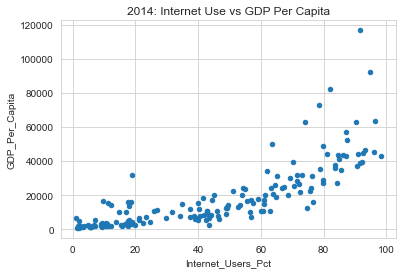

In [83]:
gdp_and_internet_use_2014.plot(kind = 'scatter', x = 'Internet_Users_Pct', y = 'GDP_Per_Capita')
plt.title('2014: Internet Use vs GDP Per Capita');

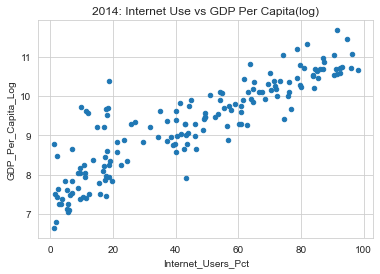

In [84]:
gdp_and_internet_use_2014.plot(kind = 'scatter', x = 'Internet_Users_Pct', y = 'GDP_Per_Capita_Log')
plt.title('2014: Internet Use vs GDP Per Capita(log)');

## 33. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

In [85]:
gdp_and_internet_use_usa =  gdp_and_internet_use.copy()
gdp_and_internet_use_usa = gdp_and_internet_use_usa[gdp_and_internet_use_usa['Country'] == 'United States']

In [86]:
gdp_and_internet_use_usa.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct
Year,1.000000,0.963218,0.969113
GDP_Per_Capita,0.963218,1.000000,0.991618
Internet_Users_Pct,0.969113,0.991618,1.000000
